In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("13.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# check shape of data
df.shape

(100, 4)

In [5]:
# Check if null value is present or not 
df.info()

# As we see their is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
# Steps to follow on making the model

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [7]:
# PRE PROCESSING STAGE

# remove column Unnamed which is unnecessary
df = df.iloc[:,1:]
# : means need all row form dataset, 1: means column from 1

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Text(0.5, 1.0, 'Placement Overview')

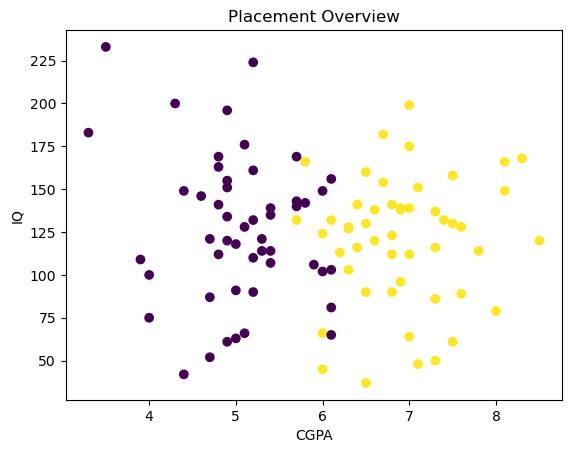

In [9]:
# EDA
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Placement Overview')

# yellow dots = individuals whose placement is done
# violet dot = individuals whose placement is not done
# c = color code for placement column

In [10]:
# extract input and output columns
# cgpa,iq = input columns = independent variables
# placement = output column = dependent varibale
X = df.iloc[:,0:2]
y = df.iloc[:,-1] # -1 means last column 

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
X.shape # 2D Tensor

(100, 2)

In [14]:
y.shape # 1D Tensor

(100,)

In [15]:
from sklearn.model_selection import train_test_split
# we have to give three things in pout train trst split 
# 1. Independent variables = X here
# 2. Dependent Variables = y here
# 3. test_size = how much data give to train and to test, 0.1 = 10% = test_data, 90% train
# it give us four dataset 
# 1. X_train
# 2. X_test
# 3. y_train
# 4. y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [16]:
X_train

,cgpa,iq
65,8.1,166.0
20,6.6,120.0
95,4.3,200.0
45,6.0,66.0
42,7.6,89.0
...,...,...
32,7.0,139.0
64,7.0,64.0
9,5.1,66.0
99,6.2,113.0


In [17]:
X_test

,cgpa,iq
14,6.1,103.0
5,7.1,48.0
6,5.7,143.0
24,4.7,121.0
89,4.9,151.0
73,4.9,61.0
27,6.0,124.0
87,5.7,132.0
3,7.4,132.0
78,6.1,81.0


In [18]:
y_train

65    1
20    1
95    0
45    1
42    1
     ..
32    1
64    1
9     0
99    1
21    1
Name: placement, Length: 90, dtype: int64

In [19]:
y_test

14    0
5     1
6     0
24    0
89    0
73    0
27    1
87    1
3     1
78    0
Name: placement, dtype: int64

In [20]:
# Scaling the values between -1 and +1
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.79885986,  1.01955046],
       [ 0.51055174, -0.12806751],
       [-1.46485405,  1.86778984],
       [-0.00477151, -1.47527123],
       [ 1.36942382, -0.90146224],
       [ 0.68232615, -0.87651402],
       [-1.20719242,  0.52058613],
       [-0.9495308 ,  0.74512008],
       [-0.00477151,  0.59543078],
       [-0.86364359, -0.17796395],
       [-0.77775638,  0.07151822],
       [ 1.28353661,  0.12141466],
       [-0.17654593,  0.42079326],
       [ 0.59643894,  0.72017186],
       [-1.80840288, -0.4024979 ],
       [-1.37896684,  0.59543078],
       [ 1.28353661, -1.60001231],
       [ 0.85410057,  1.24408442],
       [ 1.28353661,  0.81996473],
       [-2.32372613,  1.44367015],
       [ 0.68232615, -0.32765325],
       [ 1.11176219,  0.29605217],
       [ 0.42466453,  0.12141466],
       [-1.72251567, -0.62703185],
       [ 0.25289011,  0.04657   ],
       [ 0.68232615, -0.05322286],
       [ 0.42466453, -0.87651402],
       [-0.69186918,  0.17131109],
       [ 0.0811157 ,

In [23]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.28120709, -0.19731493],
       [ 1.45290332, -1.84160599],
       [-0.1874714 ,  0.99853312],
       [-1.35916762,  0.34081669],
       [-1.12482838,  1.23770273],
       [-1.12482838, -1.45295538],
       [ 0.16403747,  0.4305053 ],
       [-0.1874714 ,  0.66967491],
       [ 1.80441219,  0.66967491],
       [ 0.28120709, -0.85503135]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
# fit is the method which is used to train the model
# Model training 
clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
# evaluate the model
# here we give our test data to rain the model on new data
# and compare the result with y_test values of 0 and 1
# here we see 15 -> 0 and our model also says 0 so correct prediction but incorrect for 57
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [28]:
y_test

14    0
5     1
6     0
24    0
89    0
73    0
27    1
87    1
3     1
78    0
Name: placement, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
# give correct data and predicted data as perimeter 
accuracy_score(y_test,y_pred)
# our model predict 9/10 correct

0.7

<AxesSubplot:>

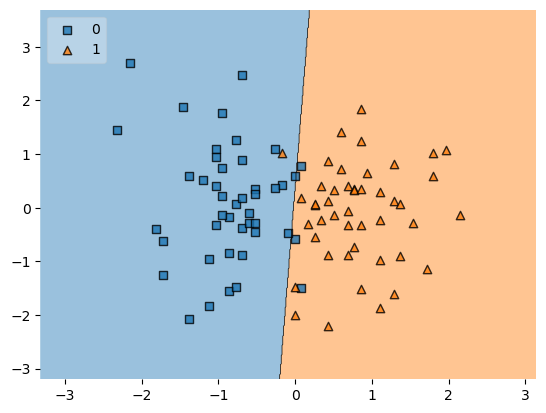

In [31]:
# how to plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=clf,legend = 2)

In [32]:
# it convert your model in a binary file which you can use in another environment
import pickle

In [33]:
# wb = write in binary mode
# now we have a model name model.pkl as a file in 100 days folder we take this file and deploy on our website.
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
# take services from - to deploy your ml model
# 1. Heroku ( Host 5 applications free)
# 2. AWS
# 3. GCP (Google cloud platform)